In [51]:
# Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
%matplotlib inline
matplotlib.style.use('ggplot')
from APIkey import gkey
import gmaps
gmaps.configure(api_key=gkey)


In [2]:
#Bring in the csv file created from the Crime Data and convert to a dataframe
csvpath = os.path.join("Yelp_reformat.csv")
#crime_df = pd.read_csv(csvpath, encoding="UTF-8")
yelptest_df = pd.read_csv(csvpath, encoding="UTF-8")
yelptest_df.columns=['County', 'Crime Rate per 100k', 'Murder', 'Rape', 'Robbery', 'Assault', 'Burglary',
                   'Larceny', 'MV Theft', 'Arson', 'Population', 'Avg_Rating','Median_Rating','Avg_Price',
                    'Rest_Count', 'Avg_Lat', 'Avg_Lng', 'CountyName', 'State']
yelptest_df.head()

,County,Crime Rate per 100k,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,Population,Avg_Rating,Median_Rating,Avg_Price,Rest_Count,Avg_Lat,Avg_Lng,CountyName,State
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,318416,4.370,4.50,1.977778,50,38.626690,-90.293315,St. Louis city,MO
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,189,28,49746,3.360,3.50,1.357143,50,35.169865,-90.424857,Crittenden County,AR
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,12,2,7629,4.160,4.00,1.720000,50,37.258090,-89.520924,Alexander County,IL
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,4,0,412,3.625,3.75,1.200000,8,27.232554,-97.740608,Kenedy County,TX
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,27083,3.875,4.00,1.285714,16,32.065037,-93.699333,De Soto Parish,LA


In [3]:
yelptest_df["Murder_per_10K"] = yelptest_df["Murder"]/yelptest_df["Population"]*10000
yelptest_df["Robbery_per_10K"] = yelptest_df["Robbery"]/yelptest_df["Population"]*10000
yelptest_df["Burglary_per_10K"] = yelptest_df["Burglary"]/yelptest_df["Population"]*10000
yelptest_df["MV_Theft_per_10K"] = yelptest_df["MV Theft"]/yelptest_df["Population"]*10000



yelptest_df.head()

,County,Crime Rate per 100k,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,...,Avg_Price,Rest_Count,Avg_Lat,Avg_Lng,CountyName,State,Murder_per_10K,Robbery_per_10K,Burglary_per_10K,MV_Theft_per_10K
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,...,1.977778,50,38.626690,-90.293315,St. Louis city,MO,3.737249,55.838903,156.870258,111.269534
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,189,28,...,1.357143,50,35.169865,-90.424857,Crittenden County,AR,1.608170,33.168496,297.913400,37.993004
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,12,2,...,1.720000,50,37.258090,-89.520924,Alexander County,IL,1.310788,6.553939,107.484598,15.729453
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,4,0,...,1.200000,8,27.232554,-97.740608,Kenedy County,TX,0.000000,24.271845,121.359223,97.087379
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,...,1.285714,16,32.065037,-93.699333,De Soto Parish,LA,1.107706,6.277000,55.016062,22.154119


In [4]:
bins = [0, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000, 9999999999999999] # first is less than or equal to 60
group_names = ["<1K", "1K-5K", "5K-10K", "10K-25K", "25K-50K","50K-100K","100K-250K","250K-500K","500K-1M",">1M"] # One less than the bin
yelptest_df["pop_groups"] = pd.cut(yelptest_df["Population"], bins, labels=group_names) 
#You can then get data by that binned column
df_pop_groups = yelptest_df.groupby("pop_groups")

df_pop_groups["Avg_Rating"].sum()

pop_groups
<1K           128.265357
1K-5K        1029.060584
5K-10K       1485.452617
10K-25K      3084.312937
25K-50K      2320.111422
50K-100K     1487.765156
100K-250K    1289.945949
250K-500K     523.776237
500K-1M       383.855881
>1M           172.058235
Name: Avg_Rating, dtype: float64

In [54]:
# Take out the very low and high population areas
# stateyelp_df =  yelptest_df[yelptest_df.State.isin(["CA"])]
stateyelp_df = yelptest_df.loc[yelptest_df["Rest_Count"] <= 50, :]
# stateyelp_df = yelptest_df.loc[yelptest_df["Rest_Count"] != 50, :]
# stateyelp_df =  yelptest_df

newyelp_df = stateyelp_df[~stateyelp_df.pop_groups.isin(["<1K", ">1M"])]
# newyelp_df = stateyelp_df[stateyelp_df.pop_groups.isin(["25K-50K"])]

print (newyelp_df["Population"].min())
print (newyelp_df["Population"].max())

1001
996554


In [55]:
pop = newyelp_df["Population"]
murder = newyelp_df["Murder_per_10K"]
crime = newyelp_df["Crime Rate per 100k"]
rating = newyelp_df["Avg_Rating"]
robbery = newyelp_df["Robbery_per_10K"]
burglary = newyelp_df["Burglary_per_10K"]
MV_theft = newyelp_df["MV_Theft_per_10K"]


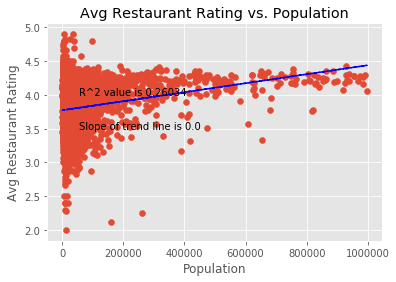

In [56]:
#Compare population to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(pop, rating)
line = slope * pop + intercept
plt.scatter(x=pop, y=rating)
plt.plot(pop, line, 'b--')

plt.title("Avg Restaurant Rating vs. Population")
plt.xlabel("Population")
plt.ylabel("Avg Restaurant Rating")
plt.text (55000,4,"R^2 value is "+ str(round(r_value,5)))
plt.text (55000,3.5,"Slope of trend line is " + str(round(slope, 5)))



plt.savefig("img_pop_rating.png")
plt.show()


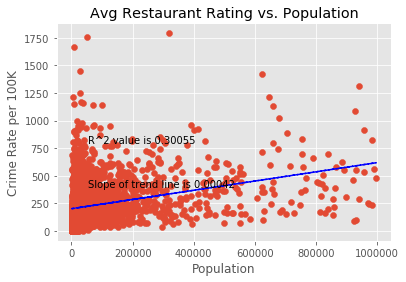

In [57]:
#Compare Crime per 100K to the population
(slope, intercept, r_value, _, _) = stats.linregress(pop, crime)
line = slope * pop + intercept
plt.scatter(x=pop, y=crime)
plt.plot(pop, line, 'b--')

plt.title("Avg Restaurant Rating vs. Population")
plt.xlabel("Population")
plt.ylabel("Crime Rate per 100K")
plt.text (55000,800,"R^2 value is "+ str(round(r_value,5)))
plt.text (55000,400,"Slope of trend line is " + str(round(slope, 5)))


plt.savefig("img_pop_crime.png")

plt.show()

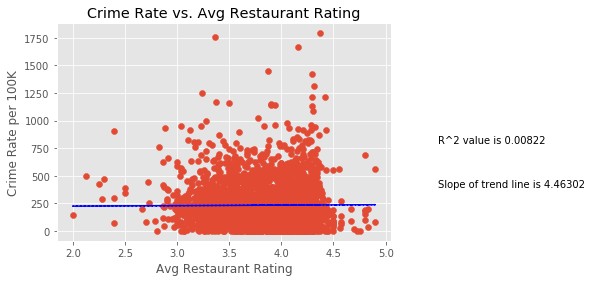

In [58]:
#Compare Crime per 100K to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(rating, crime)
line = slope * rating + intercept
plt.scatter(x=rating, y=crime)
plt.plot(rating, line, 'b--')

plt.title("Crime Rate vs. Avg Restaurant Rating")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Crime Rate per 100K")
plt.text (5.5,800,"R^2 value is "+ str(round(r_value,5)))
plt.text (5.5,400,"Slope of trend line is " + str(round(slope, 5)))


plt.savefig("img_crime_rating.png")

plt.show()


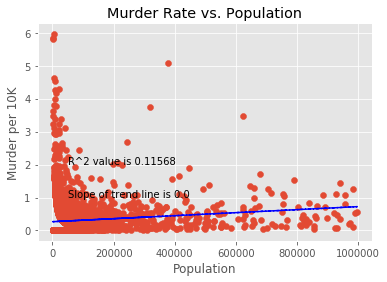

In [59]:
#Compare Murder per 10K to the population
(slope, intercept, r_value, _, _) = stats.linregress(pop, murder)
line = slope * pop + intercept
plt.scatter(x=pop, y=murder)
plt.plot(pop, line, 'b--')

plt.title("Murder Rate vs. Population")
plt.xlabel("Population")
plt.ylabel("Murder per 10K")
plt.text (51500,2,"R^2 value is "+ str(round(r_value,5)))
plt.text (51500,1,"Slope of trend line is " + str(round(slope, 5)))

plt.savefig("img_pop_murder.png")

plt.show()


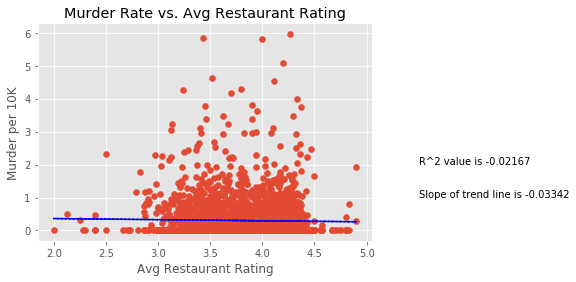

In [60]:
#Compare Murder per 10K to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(rating, murder)
line = slope * rating + intercept
plt.scatter(x=rating, y=murder)
plt.plot(rating, line, 'b--')

plt.title("Murder Rate vs. Avg Restaurant Rating")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Murder per 10K")
plt.text (5.5,2,"R^2 value is "+ str(round(r_value,5)))
plt.text (5.5,1,"Slope of trend line is " + str(round(slope, 5)))

plt.savefig("img_murder_rating.png")

plt.show()


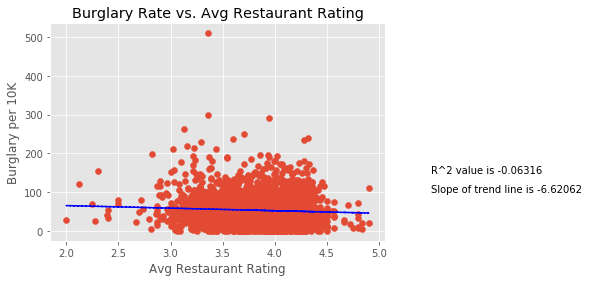

In [61]:
#Compare Burglary per 10K to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(rating, burglary)
line = slope * rating + intercept
plt.scatter(x=rating, y=burglary)
plt.plot(rating, line, 'b--')

plt.title("Burglary Rate vs. Avg Restaurant Rating")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Burglary per 10K")
plt.text (5.5,150,"R^2 value is "+ str(round(r_value,5)))
plt.text (5.5,100,"Slope of trend line is " + str(round(slope, 5)))

plt.savefig("img_burglary_rating.png")

plt.show()

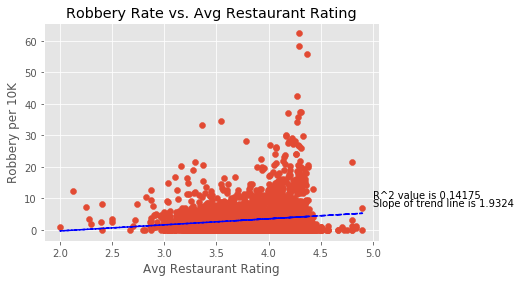

In [62]:
#Compare Robbery per 10K to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(rating, robbery)
line = slope * rating + intercept
plt.scatter(x=rating, y=robbery)
plt.plot(rating, line, 'b--')

plt.title("Robbery Rate vs. Avg Restaurant Rating")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Robbery per 10K")
plt.text (5,10,"R^2 value is "+ str(round(r_value,5)))
plt.text (5,7.5,"Slope of trend line is " + str(round(slope, 5)))

plt.savefig("img_robbery_rating.png")

plt.show()

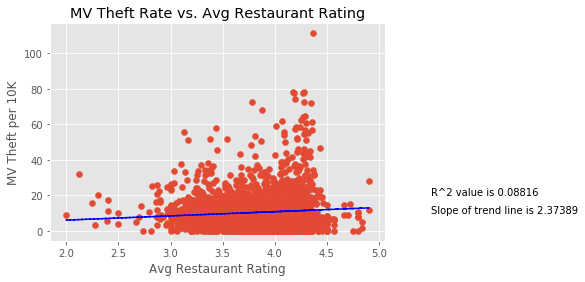

In [63]:
#Compare MV_theft per 10K to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(rating, MV_theft)
line = slope * rating + intercept
plt.scatter(x=rating, y=MV_theft)
plt.plot(rating, line, 'b--')

plt.title("MV Theft Rate vs. Avg Restaurant Rating")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("MV Theft per 10K")
plt.text (5.5,20,"R^2 value is "+ str(round(r_value,5)))
plt.text (5.5,10,"Slope of trend line is " + str(round(slope, 5)))

plt.savefig("img_MV_theft_rating.png")

plt.show()

In [64]:
newyelp_df = newyelp_df.reset_index (drop = True)

In [65]:
# Create a list of coordinates
Avg_Lat = list(newyelp_df["Avg_Lat"])
Avg_Lng = list(newyelp_df["Avg_Lng"])
Crime_rate = list(crime)

# coordinates = zip(newyelp_df["Avg_Lat"], newyelp_df["Avg_Lng"])
coordinates = newyelp_df[["Avg_Lat", "Avg_Lng"]]

In [66]:
# Create a heat map of crime rates
fig = gmaps.figure() 
heat_layer = gmaps.heatmap_layer(coordinates, weights=crime, max_intensity=600)
fig.add_layer(heat_layer)
plt.savefig("img_crime_heat.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [70]:
# Create a heat map of ratings
fig = gmaps.figure() 
heat_layer = gmaps.heatmap_layer(coordinates, weights=rating, max_intensity=10)
fig.add_layer(heat_layer)
plt.savefig("img_ratings_heat.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>